In [35]:
import pandas as pd

In [36]:
import numpy as np

In [ ]:
import requests
from bs4 import BeautifulSoup  
import pandas as pd
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions 

In [ ]:
def getReviews(page_url):

    reviews=[]
    end = False
    # enter your codes here
    
    names=[]
    ratings=[]
    dates=[]
    review_contents=[]
    useful=[]
    funny=[]
    cool=[]
    friends=[]
    reviewsCount=[]
    driver = webdriver.Chrome()
    driver.get(page_url) 
    time.sleep(5)
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")  
    time.sleep(2)
    
    while not end:
        html = driver.page_source
        soup = BeautifulSoup(html.encode('utf-8'),"html.parser")
        reviews = soup.find_all("div", class_="review__373c0__3MsBX border-color--default__373c0__1WKlL")
        for review in reviews:
            try:
                ## names
                name=review.find("a", class_='css-166la90').text
                names.append(name)
            except:
                names.append(None)

            try:
                ## ratings
                rating=review.find("div", class_='arrange__373c0__2S3dc gutter-1__373c0__3zF2l vertical-align-middle__373c0__7yhdw border-color--default__373c0__1WKlL').find("span", class_="display--inline__373c0__1gaV4 border-color--default__373c0__1yxBb").find("div")["aria-label"]
                ratings.append(rating)
            except:
                ratings.append(None)

            try:
                ## dates
                date=review.find("div", class_='arrange__373c0__2S3dc gutter-1__373c0__3zF2l vertical-align-middle__373c0__7yhdw border-color--default__373c0__1WKlL').find("span", class_="css-e81eai").text
                dates.append(date)
            except:
                dates.append(None)

            try:
                ## friends and number of reviews of reviewer
                divs = review.find("div", class_='user-passport-stats__373c0__2nBtY border-color--default__373c0__r305k').find_all("div")
                for div in divs:
                    if div["aria-label"] == "Friends":
                        try:
                            friends.append(div.find("span", class_="css-1dgkz3l").text)
                        except:
                            friends.append(None)
                    elif div["aria-label"] == "Reviews":
                        try:
                            reviewsCount.append(div.find("span", class_="css-1dgkz3l").text)
                        except:
                            reviewsCount.append(None)
            except:
                friends.append(None)
                reviewCount.append(None)
            try:
                ##review contents
                review_content=review.find("span", class_='raw__373c0__tQAx6').text
                review_contents.append(review_content)
            except:
                review_contents.append(None)

            try:
                ## useful, funny, cool
                mixed=review.find_all("div", class_='arrange__373c0__2S3dc vertical-align-middle__373c0__7yhdw border-color--default__373c0__1WKlL')[-1].find_all("span", class_="css-1ha1j8d")
                try:
                    usef = mixed[0].find("span", class_="css-3fag8g").text
                    useful.append(usef)
                except:
                    useful.append(None)
                try:
                    fun = mixed[2].find("span", class_="css-3fag8g").text
                    funny.append(fun)
                except:
                    funny.append(None)
                try:
                    coo = mixed[1].find("span", class_="css-3fag8g").text
                    cool.append(coo)
                except:
                    cool.append(None)    
            except:
                useful.append(None)
                funny.append(None)
                cool.append(None)
                
        try:
            driver.find_element_by_css_selector("a.next-link").click()
            
            time.sleep(5)
        except:
            end = True
            

    reviews_df = pd.DataFrame()
    reviews_df["reviewer"]=names
    reviews_df["rating"]=ratings
    reviews_df["date"]=dates
    reviews_df["review"]=review_contents
    reviews_df["useful"]=useful
    reviews_df["funny"]=funny
    reviews_df["cool"]=cool
    reviews_df["friends"]=friends
    reviews_df["reviewsCount"]=reviewsCount
    driver.quit()
    
    return reviews_df 

In [ ]:
import requests
from bs4 import BeautifulSoup  
import pandas as pd
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions 

driver = webdriver.Chrome()
search_url = "https://www.yelp.com/search?find_desc=Italian%20Food&find_near=new-york-city-new-york-14"
driver.get(search_url) 
time.sleep(2)
html = driver.page_source
soup = BeautifulSoup(html.encode('utf-8'),"html.parser")

links = soup.find_all("a", class_="css-1f2a2s6")
restaurant_links = []
for link in links:
    if link["href"].startswith("/biz"):
        restaurant_links.append(link["href"])
        
driver.close()
        
init_url = "https://www.yelp.com"
appendToURL = "?sort_by=date_desc"

reviews=[]
for restaurant in restaurant_links:
    reviews.append(getReviews(init_url+restaurant+appendToURL))

review

In [ ]:
for i in range(len(restaurant_links)):
    midPart = restaurant_links[i].replace("/biz/", "").split("?")[0]
    reviews[i].to_excel('Midterm\\'+ midPart +'.xlsx')

In [37]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [38]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\didil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [39]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\didil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [40]:
from datetime import date
d1 = date(2020, 3, 15)
d2 = date(2021, 1, 31)

In [41]:
#function for time flags
def label_race (row):
    if row['date'] < d1:
        return 'A'
    if d1<=row['date']<=d2:
        
        return 'B'
    
    if row['date'] > d2:
        return 'C'

In [42]:
#function for lemmatization
def lemmatize(text):
    """Perform lemmatization and stopword removal in the clean text
       Returns a list of lemmas
    """
    doc = nlp(text)
    lemma_list = [str(tok.lemma_) for tok in doc]
    return lemma_list

In [43]:
def sentiment(token):
    
    negativeCount=0
    positiveCount=0
    i=0

    while i < len(token)-1:
       
        if token[i] in positive_words:
                positiveCount += 1
        elif token[i] in negative_words:
                negativeCount += 1
        elif token[i] in negations:
            if token[i+1] in positive_words:
                negativeCount += 1
                i += 1
            elif token[i+1] in negative_words:
                positiveCount +=1
                i += 1
        i+=1
    if token[len(token)-1] in positive_words:
                positiveCount += 1
    elif token[len(token)-1] in negative_words:
                negativeCount += 1    
    return positiveCount - negativeCount

In [44]:
f = open(r"C:\Users\didil\Downloads\positive-words.txt")
positive_words=[line.strip() for line in f]

In [45]:
g = open(r"C:\Users\didil\Downloads\positive-words.txt")
negative_words=[line.strip() for line in g]

In [46]:
negations = ['not', 'too', 'n\'t', 'no', 'cannot', 'neither','nor']

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
df1= pd.read_csv(r'C:\Users\didil\OneDrive\Bureau\BIA660\final project\done\aunt-jakes-new-york-4.csv', header =0)

In [50]:
df1['date'] = pd.to_datetime(df1['date'])

In [51]:
df1['timeflags'] = df1.apply (lambda row: label_race(row), axis=1)

In [53]:
# replace text with only numbers for ratings
df1.replace('5 star rating', '5', inplace=True)
df1.replace('4 star rating', '4', inplace = True)
df1.replace('3 star rating', '3', inplace = True)
df1.replace('2 star rating', '2', inplace=True)
df1.replace('1 star rating', '1', inplace =True)

In [54]:
# replace null value in columns useful, funny and cool with 0 (meaning nobody clicked on either of these buttons)
df1['useful'].fillna(0, inplace = True)
df1['funny'].fillna(0, inplace = True)
df1['cool'].fillna(0, inplace = True)
df1['friends'].fillna(0, inplace=True)

In [55]:
df1.isnull().values.any()

False

In [56]:
# defining reviewers as number instead of their names
df1.drop(columns = ['Unnamed: 0'] , inplace=True)
df1['reviewer']=np.arange(df1.shape[0])
df1['reviewer']= df1.index+1

In [57]:
# get reviews in lower case
df1['review']=df1['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [58]:
# remove punctuation
df1['review']= df1['review'].str.replace('[^\w\s]','')

In [59]:
# remove stop words

stopwords = stopwords.words('english')
df1['review'] = df1['review'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwords))


In [60]:
#tokenization
df1['token review'] = df1['review'].apply(lambda row: word_tokenize(row))

In [61]:
#lemmatization
df1['review_lemmatized'] = df1['review'].apply(lemmatize)

In [68]:
#same operation for second table

In [69]:
df2= pd.read_csv(r'C:\Users\didil\OneDrive\Bureau\BIA660\final project\done\bigoi-venezia-new-york.csv', header =0)

In [70]:
df2.isnull().values.any()

True

In [71]:
df2['date'] = pd.to_datetime(df2['date'])

In [72]:
df2['timeflags'] = df2.apply (lambda row: label_race(row), axis=1)

In [73]:
# replace text with only numbers for ratings
df2.replace('5 star rating', '5', inplace=True)
df2.replace('4 star rating', '4', inplace = True)
df2.replace('3 star rating', '3', inplace = True)
df2.replace('2 star rating', '2', inplace=True)
df2.replace('1 star rating', '1', inplace =True)

In [74]:
# replace null value in columns useful, funny and cool with 0 (meaning nobody clicked on either of these buttons)
df2['useful'].fillna(0, inplace = True)
df2['funny'].fillna(0, inplace = True)
df2['cool'].fillna(0, inplace = True)
df2['friends'].fillna(0, inplace=True)

In [75]:
# defining reviewers as number instead of their names
df2.drop(columns = ['Unnamed: 0'] , inplace=True)
df2['reviewer']=np.arange(df2.shape[0])
df2['reviewer']= df2.index+1

In [76]:
# get reviews in lower case
df2['review']=df2['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [77]:
# remove punctuation
df2['review']= df2['review'].str.replace('[^\w\s]','')

In [78]:
# remove stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
df2['review'] = df2['review'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwords))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\didil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [79]:
#tokenization
df2['token review'] = df2['review'].apply(lambda row: word_tokenize(row))

In [80]:
#lemmatization
df2['review_lemmatized'] = df2['review'].apply(lemmatize)

In [82]:
#same operation for third table

In [83]:
df3= pd.read_csv(r'C:\Users\didil\OneDrive\Bureau\BIA660\final project\done\nocciola-ristorante-new-york-3.csv', header =0)

In [84]:
df3['date'] = pd.to_datetime(df3['date'])

In [85]:
df3['timeflags'] = df3.apply (lambda row: label_race(row), axis=1)

In [86]:
# replace text with only numbers for ratings
df3.replace('5 star rating', '5', inplace=True)
df3.replace('4 star rating', '4', inplace = True)
df3.replace('3 star rating', '3', inplace = True)
df3.replace('2 star rating', '2', inplace=True)
df3.replace('1 star rating', '1', inplace =True)

In [87]:
# replace null value in columns useful, funny and cool with 0 (meaning nobody clicked on either of these buttons)
df3['useful'].fillna(0, inplace = True)
df3['funny'].fillna(0, inplace = True)
df3['cool'].fillna(0, inplace = True)
df3['friends'].fillna(0, inplace=True)

In [88]:
# defining reviewers as number instead of their names
df3.drop(columns = ['Unnamed: 0'] , inplace=True)
df3['reviewer']=np.arange(df3.shape[0])
df3['reviewer']= df3.index+1

In [89]:
# get reviews in lower case
df3['review']=df3['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [90]:
# remove punctuation
df3['review']= df3['review'].str.replace('[^\w\s]','')

In [91]:
# remove stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
df3['review'] = df3['review'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwords))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\didil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [92]:
#tokenization
df3['token review'] = df3['review'].apply(lambda row: word_tokenize(row))

In [93]:
#lemmatization
df3['review_lemmatized'] = df3.review.apply(lemmatize)

In [111]:
#same operation for fourth table

In [112]:
df4= pd.read_csv(r'C:\Users\didil\OneDrive\Bureau\BIA660\final project\done\osteria-106-new-york.csv', header =0)

In [113]:
df4['date'] = pd.to_datetime(df4['date'])

In [114]:
df4['timeflags'] = df4.apply (lambda row: label_race(row), axis=1)

In [115]:
# replace text with only numbers for ratings
df4.replace('5 star rating', '5', inplace=True)
df4.replace('4 star rating', '4', inplace = True)
df4.replace('3 star rating', '3', inplace = True)
df4.replace('2 star rating', '2', inplace=True)
df4.replace('1 star rating', '1', inplace =True)

In [116]:
# replace null value in columns useful, funny and cool with 0 (meaning nobody clicked on either of these buttons)
df4['useful'].fillna(0, inplace = True)
df4['funny'].fillna(0, inplace = True)
df4['cool'].fillna(0, inplace = True)
df4['friends'].fillna(0, inplace=True)

In [117]:
# defining reviewers as number instead of their names
df4.drop(columns = ['Unnamed: 0'] , inplace=True)
df4['reviewer']=np.arange(df4.shape[0])
df4['reviewer']= df4.index+1

In [118]:
# get reviews in lower case
df4['review']=df4['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [119]:
# remove punctuation
df4['review']= df4['review'].str.replace('[^\w\s]','')

In [120]:
# remove stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
df4['review'] = df4['review'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwords))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\didil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [121]:
#tokenization
df4['token review'] = df4['review'].apply(lambda row: word_tokenize(row))

In [122]:
#lemmatization
df4['review_lemmatized'] = df4.review.apply(lemmatize)

In [123]:
df4['timeflags'] = df4.apply (lambda row: label_race(row), axis=1)

In [125]:
#same operation for fifth table

In [126]:
df5= pd.read_csv(r'C:\Users\didil\OneDrive\Bureau\BIA660\final project\done\osteria-laura-new-york.csv', header =0)

In [127]:
df5['date'] = pd.to_datetime(df5['date'])

In [128]:
df5['timeflags'] = df5.apply (lambda row: label_race(row), axis=1)

In [129]:
# replace text with only numbers for ratings
df5.replace('5 star rating', '5', inplace=True)
df5.replace('4 star rating', '4', inplace = True)
df5.replace('3 star rating', '3', inplace = True)
df5.replace('2 star rating', '2', inplace=True)
df5.replace('1 star rating', '1', inplace =True)

In [130]:
# replace null value in columns useful, funny and cool with 0 (meaning nobody clicked on either of these buttons)
df5['useful'].fillna(0, inplace = True)
df5['funny'].fillna(0, inplace = True)
df5['cool'].fillna(0, inplace = True)
df5['friends'].fillna(0, inplace=True)

In [131]:
# defining reviewers as number instead of their names
df5.drop(columns = ['Unnamed: 0'] , inplace=True)
df5['reviewer']=np.arange(df5.shape[0])
df5['reviewer']= df5.index+1

In [132]:
# get reviews in lower case
df5['review']=df5['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [133]:
# remove punctuation
df5['review']= df5['review'].str.replace('[^\w\s]','')

In [134]:
# remove stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
df5['review'] = df5['review'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwords))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\didil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [135]:
#tokenization
df5['token review'] = df5['review'].apply(lambda row: word_tokenize(row))

In [136]:
#lemmatization
df5['review_lemmatized'] = df5.review.apply(lemmatize)

In [138]:
#same operation for sixth table

In [139]:
df6= pd.read_csv(r'C:\Users\didil\OneDrive\Bureau\BIA660\final project\done\raos-new-york.csv', header =0)

In [140]:
df6['date'] = pd.to_datetime(df6['date'])

In [141]:
df6['timeflags'] = df6.apply (lambda row: label_race(row), axis=1)

In [142]:
# replace text with only numbers for ratings
df6.replace('5 star rating', '5', inplace=True)
df6.replace('4 star rating', '4', inplace = True)
df6.replace('3 star rating', '3', inplace = True)
df6.replace('2 star rating', '2', inplace=True)
df6.replace('1 star rating', '1', inplace =True)

In [143]:
# replace null value in columns useful, funny and cool with 0 (meaning nobody clicked on either of these buttons)
df6['useful'].fillna(0, inplace = True)
df6['funny'].fillna(0, inplace = True)
df6['cool'].fillna(0, inplace = True)
df6['friends'].fillna(0, inplace=True)

In [144]:
# defining reviewers as number instead of their names
#df6.drop(columns = ['Unnamed: 0'] , inplace=True)
df6['reviewer']=np.arange(df6.shape[0])
df6['reviewer']= df6.index+1

In [145]:
# get reviews in lower case
df6['review']=df6['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [146]:
# remove punctuation
df6['review']= df6['review'].str.replace('[^\w\s]','')

In [147]:
# remove stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
df6['review'] = df6['review'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwords))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\didil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [148]:
#tokenization
df6['token review'] = df6['review'].apply(lambda row: word_tokenize(row))

In [149]:
#lemmatization
df6['review_lemmatized'] = df6.review.apply(lemmatize)

In [151]:
#same operation for seventh table

In [152]:
df7= pd.read_csv(r'C:\Users\didil\OneDrive\Bureau\BIA660\final project\done\travertino-cucina-romana-new-york-3.csv', header =0)

In [153]:
df7['date'] = pd.to_datetime(df7['date'])

In [154]:
df7['timeflags'] = df7.apply (lambda row: label_race(row), axis=1)

In [155]:
# replace text with only numbers for ratings
df7.replace('5 star rating', '5', inplace=True)
df7.replace('4 star rating', '4', inplace = True)
df7.replace('3 star rating', '3', inplace = True)
df7.replace('2 star rating', '2', inplace=True)
df7.replace('1 star rating', '1', inplace =True)

In [156]:
# replace null value in columns useful, funny and cool with 0 (meaning nobody clicked on either of these buttons)
df7['useful'].fillna(0, inplace = True)
df7['funny'].fillna(0, inplace = True)
df7['cool'].fillna(0, inplace = True)
df7['friends'].fillna(0, inplace=True)

In [157]:
# defining reviewers as number instead of their names
df7.drop(columns = ['Unnamed: 0'] , inplace=True)
df7['reviewer']=np.arange(df7.shape[0])
df7['reviewer']= df7.index+1

In [158]:
# get reviews in lower case
df7['review']=df7['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [159]:
# remove punctuation
df7['review']= df7['review'].str.replace('[^\w\s]','')

In [160]:
# remove stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
df7['review'] = df7['review'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwords))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\didil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [161]:
#tokenization
df7['token review'] = df7['review'].apply(lambda row: word_tokenize(row))

In [162]:
#lemmatization
df7['review_lemmatized'] = df7.review.apply(lemmatize)

In [164]:
#same operation for 8th table

In [165]:
df8= pd.read_csv(r'C:\Users\didil\OneDrive\Bureau\BIA660\final project\done\uva-new-york.csv', header =0)

In [166]:
df8['date'] = pd.to_datetime(df8['date'])

In [167]:
df8['timeflags'] = df8.apply (lambda row: label_race(row), axis=1)

In [168]:
# replace text with only numbers for ratings
df8.replace('5 star rating', '5', inplace=True)
df8.replace('4 star rating', '4', inplace = True)
df8.replace('3 star rating', '3', inplace = True)
df8.replace('2 star rating', '2', inplace=True)
df8.replace('1 star rating', '1', inplace =True)

In [169]:
# replace null value in columns useful, funny and cool with 0 (meaning nobody clicked on either of these buttons)
df8['useful'].fillna(0, inplace = True)
df8['funny'].fillna(0, inplace = True)
df8['cool'].fillna(0, inplace = True)
df8['friends'].fillna(0, inplace=True)

In [170]:
# defining reviewers as number instead of their names
#df8.drop(columns = ['Unnamed: 0'] , inplace=True)
df8['reviewer']=np.arange(df8.shape[0])
df8['reviewer']= df8.index+1

In [171]:
# get reviews in lower case
df8['review']=df8['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [172]:
# remove punctuation
df8['review']= df8['review'].str.replace('[^\w\s]','')

In [173]:
# remove stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
df8['review'] = df8['review'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwords))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\didil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [174]:
#tokenization
df8['token review'] = df8['review'].apply(lambda row: word_tokenize(row))

In [175]:
#lemmatization
df8['review_lemmatized'] = df8.review.apply(lemmatize)

In [177]:
#same operation for 9th table

In [178]:
df9= pd.read_csv(r'C:\Users\didil\OneDrive\Bureau\BIA660\final project\done\vinater^1C3^1ADa-new-york-4.csv', header =0)

In [179]:
df9['date'] = pd.to_datetime(df9['date'])

In [180]:
df9['timeflags'] = df9.apply (lambda row: label_race(row), axis=1)

In [181]:
# replace text with only numbers for ratings
df9.replace('5 star rating', '5', inplace=True)
df9.replace('4 star rating', '4', inplace = True)
df9.replace('3 star rating', '3', inplace = True)
df9.replace('2 star rating', '2', inplace=True)
df9.replace('1 star rating', '1', inplace =True)

In [182]:
# replace null value in columns useful, funny and cool with 0 (meaning nobody clicked on either of these buttons)
df9['useful'].fillna(0, inplace = True)
df9['funny'].fillna(0, inplace = True)
df9['cool'].fillna(0, inplace = True)
df9['friends'].fillna(0, inplace=True)

In [183]:
# defining reviewers as number instead of their names
#df9.drop(columns = ['Unnamed: 0'] , inplace=True)
df9['reviewer']=np.arange(df9.shape[0])
df9['reviewer']= df9.index+1

In [184]:
# get reviews in lower case
df9['review']=df9['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [185]:
# remove punctuation
df9['review']= df9['review'].str.replace('[^\w\s]','')

In [186]:
# remove stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
df9['review'] = df9['review'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwords))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\didil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [187]:
#tokenization
df9['token review'] = df9['review'].apply(lambda row: word_tokenize(row))

In [188]:
#lemmatization
df9['review_lemmatized'] = df9.review.apply(lemmatize)

In [199]:
df10= pd.read_csv(r'C:\Users\didil\OneDrive\Bureau\BIA660\final project\babbalucci-new-york.xlsx - Sheet1.csv', header =0)

In [200]:
df10['date'] = pd.to_datetime(df10['date'])

In [201]:
df10['timeflags'] = df10.apply (lambda row: label_race(row), axis=1)

In [202]:
# replace text with only numbers for ratings
df10.replace('5 star rating', '5', inplace=True)
df10.replace('4 star rating', '4', inplace = True)
df10.replace('3 star rating', '3', inplace = True)
df10.replace('2 star rating', '2', inplace=True)
df10.replace('1 star rating', '1', inplace =True)

In [203]:
# replace null value in columns useful, funny and cool with 0 (meaning nobody clicked on either of these buttons)
df10['useful'].fillna(0, inplace = True)
df10['funny'].fillna(0, inplace = True)
df10['cool'].fillna(0, inplace = True)
df10['friends'].fillna(0, inplace=True)

In [204]:
# defining reviewers as number instead of their names
df10.drop(columns = ['Unnamed: 0'] , inplace=True)
df10['reviewer']=np.arange(df10.shape[0])
df10['reviewer']= df10.index+1

In [205]:
# get reviews in lower case
df10['review']=df10['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [206]:
# remove punctuation
df10['review']= df10['review'].str.replace('[^\w\s]','')

In [207]:
# remove stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
df10['review'] = df10['review'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwords))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\didil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [208]:
#tokenization
df10['token review'] = df10['review'].apply(lambda row: word_tokenize(row))

In [209]:
#lemmatization
df10['review_lemmatized'] = df10.review.apply(lemmatize)

In [212]:
df11= pd.read_csv(r'C:\Users\didil\OneDrive\Bureau\BIA660\final project\carmines-italian-restaurant-upper-west-side-new-york.xlsx - Sheet1.csv', header =0)

In [213]:
df11['date'] = pd.to_datetime(df11['date'])

In [214]:
df11['timeflags'] = df11.apply (lambda row: label_race(row), axis=1)

In [215]:
# replace text with only numbers for ratings
df11.replace('5 star rating', '5', inplace=True)
df11.replace('4 star rating', '4', inplace = True)
df11.replace('3 star rating', '3', inplace = True)
df11.replace('2 star rating', '2', inplace=True)
df11.replace('1 star rating', '1', inplace =True)

In [216]:
# replace null value in columns useful, funny and cool with 0 (meaning nobody clicked on either of these buttons)
df11['useful'].fillna(0, inplace = True)
df11['funny'].fillna(0, inplace = True)
df11['cool'].fillna(0, inplace = True)
df11['friends'].fillna(0, inplace=True)

In [217]:
# defining reviewers as number instead of their names
df11.drop(columns = ['Unnamed: 0'] , inplace=True)
df11['reviewer']=np.arange(df11.shape[0])
df11['reviewer']= df11.index+1

In [218]:
# get reviews in lower case
df11['review']=df11['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [219]:
# remove punctuation
df11['review']= df11['review'].str.replace('[^\w\s]','')

In [220]:
# remove stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
df11['review'] = df11['review'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwords))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\didil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [221]:
#tokenization
df11['token review'] = df11['review'].apply(lambda row: word_tokenize(row))

In [222]:
#lemmatization
df11['review_lemmatized'] = df11.review.apply(lemmatize)

In [225]:
df12= pd.read_csv(r'C:\Users\didil\OneDrive\Bureau\BIA660\final project\fumo-new-york-3.xlsx - Sheet1.csv', header =0)

In [226]:
df12['date'] = pd.to_datetime(df12['date'])

In [227]:
# replace text with only numbers for ratings
df12.replace('5 star rating', '5', inplace=True)
df12.replace('4 star rating', '4', inplace = True)
df12.replace('3 star rating', '3', inplace = True)
df12.replace('2 star rating', '2', inplace=True)
df12.replace('1 star rating', '1', inplace =True)

In [228]:
# replace null value in columns useful, funny and cool with 0 (meaning nobody clicked on either of these buttons)
df12['useful'].fillna(0, inplace = True)
df12['funny'].fillna(0, inplace = True)
df12['cool'].fillna(0, inplace = True)
df12['friends'].fillna(0, inplace=True)

In [229]:
# defining reviewers as number instead of their names
df12.drop(columns = ['Unnamed: 0'] , inplace=True)
df12['reviewer']=np.arange(df12.shape[0])
df12['reviewer']= df12.index+1

In [230]:
# get reviews in lower case
df12['review']=df12['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [231]:
# remove punctuation
df12['review']= df12['review'].str.replace('[^\w\s]','')

In [232]:
# remove stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
df12['review'] = df12['review'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwords))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\didil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [233]:
#tokenization
df12['token review'] = df12['review'].apply(lambda row: word_tokenize(row))

In [234]:
#lemmatization
df12['review_lemmatized'] = df12.review.apply(lemmatize)

In [237]:
df13= pd.read_csv(r'C:\Users\didil\OneDrive\Bureau\BIA660\final project\lido-new-york.xlsx - Sheet1.csv', header =0)

In [238]:
df13['date'] = pd.to_datetime(df13['date'])

In [239]:
df13['timeflags'] = df13.apply (lambda row: label_race(row), axis=1)

In [240]:
# replace text with only numbers for ratings
df13.replace('5 star rating', '5', inplace=True)
df13.replace('4 star rating', '4', inplace = True)
df13.replace('3 star rating', '3', inplace = True)
df13.replace('2 star rating', '2', inplace=True)
df13.replace('1 star rating', '1', inplace =True)

In [241]:
# replace null value in columns useful, funny and cool with 0 (meaning nobody clicked on either of these buttons)
df13['useful'].fillna(0, inplace = True)
df13['funny'].fillna(0, inplace = True)
df13['cool'].fillna(0, inplace = True)
df13['friends'].fillna(0, inplace=True)

In [242]:
# defining reviewers as number instead of their names
df13.drop(columns = ['Unnamed: 0'] , inplace=True)
df13['reviewer']=np.arange(df13.shape[0])
df13['reviewer']= df13.index+1

In [243]:
# get reviews in lower case
df13['review']=df13['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [244]:
# remove punctuation
df13['review']= df13['review'].str.replace('[^\w\s]','')

In [245]:
# remove stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
df13['review'] = df13['review'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwords))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\didil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [246]:
#tokenization
df13['token review'] = df13['review'].apply(lambda row: word_tokenize(row))

In [247]:
#lemmatization
df13['review_lemmatized'] = df13.review.apply(lemmatize)

In [250]:
df14= pd.read_csv(r'C:\Users\didil\OneDrive\Bureau\BIA660\final project\ortomare-ristorante-pizzeria-new-york-2.xlsx - Sheet1.csv', header =0)

In [251]:
df14['date'] = pd.to_datetime(df14['date'])

In [252]:
df14['timeflags'] = df14.apply (lambda row: label_race(row), axis=1)

In [253]:
# replace text with only numbers for ratings
df14.replace('5 star rating', '5', inplace=True)
df14.replace('4 star rating', '4', inplace = True)
df14.replace('3 star rating', '3', inplace = True)
df14.replace('2 star rating', '2', inplace=True)
df14.replace('1 star rating', '1', inplace =True)

In [254]:
# replace null value in columns useful, funny and cool with 0 (meaning nobody clicked on either of these buttons)
df14['useful'].fillna(0, inplace = True)
df14['funny'].fillna(0, inplace = True)
df14['cool'].fillna(0, inplace = True)
df14['friends'].fillna(0, inplace=True)

In [255]:
# defining reviewers as number instead of their names
df14.drop(columns = ['Unnamed: 0'] , inplace=True)
df14['reviewer']=np.arange(df14.shape[0])
df14['reviewer']= df14.index+1

In [256]:
# get reviews in lower case
df14['review']=df14['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [257]:
# remove punctuation
df14['review']= df14['review'].str.replace('[^\w\s]','')

In [258]:
# remove stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
df14['review'] = df14['review'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwords))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\didil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [259]:
#tokenization
df14['token review'] = df14['review'].apply(lambda row: word_tokenize(row))

In [260]:
#lemmatization
df14['review_lemmatized'] = df14.review.apply(lemmatize)

In [263]:
df15= pd.read_csv(r'C:\Users\didil\OneDrive\Bureau\BIA660\final project\patsys-pizzeria-new-york-7.xlsx - Sheet1.csv', header =0)

In [264]:
df15['date'] = pd.to_datetime(df15['date'])

In [265]:
df15['timeflags'] = df15.apply (lambda row: label_race(row), axis=1)

In [266]:
# replace text with only numbers for ratings
df15.replace('5 star rating', '5', inplace=True)
df15.replace('4 star rating', '4', inplace = True)
df15.replace('3 star rating', '3', inplace = True)
df15.replace('2 star rating', '2', inplace=True)
df15.replace('1 star rating', '1', inplace =True)

In [267]:
# replace null value in columns useful, funny and cool with 0 (meaning nobody clicked on either of these buttons)
df15['useful'].fillna(0, inplace = True)
df15['funny'].fillna(0, inplace = True)
df15['cool'].fillna(0, inplace = True)
df15['friends'].fillna(0, inplace=True)

In [268]:
# defining reviewers as number instead of their names
df15.drop(columns = ['Unnamed: 0'] , inplace=True)
df15['reviewer']=np.arange(df15.shape[0])
df15['reviewer']= df15.index+1

In [269]:
# get reviews in lower case
df15['review']=df15['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [270]:
# remove punctuation
df15['review']= df15['review'].str.replace('[^\w\s]','')

In [271]:
# remove stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
df15['review'] = df15['review'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwords))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\didil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [272]:
#tokenization
df15['token review'] = df15['review'].apply(lambda row: word_tokenize(row))

In [273]:
#lemmatization
df15['review_lemmatized'] = df15.review.apply(lemmatize)

In [275]:
df15.drop(columns = ['Link', 'Tags', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34'], inplace=True, axis=1)

In [278]:
df16= pd.read_csv(r'C:\Users\didil\OneDrive\Bureau\BIA660\final project\pisticci-new-york.xlsx - Sheet1.csv', header =0)

In [279]:
df16['date'] = pd.to_datetime(df16['date'])

In [280]:
df16['timeflags'] = df16.apply (lambda row: label_race(row), axis=1)

In [281]:
# replace text with only numbers for ratings
df16.replace('5 star rating', '5', inplace=True)
df16.replace('4 star rating', '4', inplace = True)
df16.replace('3 star rating', '3', inplace = True)
df16.replace('2 star rating', '2', inplace=True)
df16.replace('1 star rating', '1', inplace =True)

In [282]:
# replace null value in columns useful, funny and cool with 0 (meaning nobody clicked on either of these buttons)
df16['useful'].fillna(0, inplace = True)
df16['funny'].fillna(0, inplace = True)
df16['cool'].fillna(0, inplace = True)
df16['friends'].fillna(0, inplace=True)

In [283]:
# defining reviewers as number instead of their names
df16.drop(columns = ['Unnamed: 0'] , inplace=True)
df16['reviewer']=np.arange(df16.shape[0])
df16['reviewer']= df16.index+1

In [284]:
# get reviews in lower case
df16['review']=df16['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [285]:
# remove punctuation
df16['review']= df16['review'].str.replace('[^\w\s]','')

In [286]:
# remove stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
df16['review'] = df16['review'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwords))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\didil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [287]:
#tokenization
df16['token review'] = df16['review'].apply(lambda row: word_tokenize(row))

In [288]:
#lemmatization
df16['review_lemmatized'] = df16.review.apply(lemmatize)

In [291]:
df17= pd.read_csv(r'C:\Users\didil\OneDrive\Bureau\BIA660\final project\sfoglia-restaurant-new-york.xlsx - Sheet1.csv', header =0)

In [292]:
df17['date'] = pd.to_datetime(df17['date'])

In [293]:
df17['timeflags'] = df17.apply (lambda row: label_race(row), axis=1)

In [294]:
# replace text with only numbers for ratings
df17.replace('5 star rating', '5', inplace=True)
df17.replace('4 star rating', '4', inplace = True)
df17.replace('3 star rating', '3', inplace = True)
df17.replace('2 star rating', '2', inplace=True)
df17.replace('1 star rating', '1', inplace =True)

In [295]:
# replace null value in columns useful, funny and cool with 0 (meaning nobody clicked on either of these buttons)
df17['useful'].fillna(0, inplace = True)
df17['funny'].fillna(0, inplace = True)
df17['cool'].fillna(0, inplace = True)
df17['friends'].fillna(0, inplace=True)

In [296]:
# defining reviewers as number instead of their names
df17.drop(columns = ['Unnamed: 0'] , inplace=True)
df17['reviewer']=np.arange(df17.shape[0])
df17['reviewer']= df17.index+1

In [297]:
# get reviews in lower case
df17['review']=df17['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [298]:
# remove punctuation
df17['review']= df17['review'].str.replace('[^\w\s]','')

In [299]:
# remove stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
df17['review'] = df17['review'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwords))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\didil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [300]:
#tokenization
df17['token review'] = df17['review'].apply(lambda row: word_tokenize(row))

In [301]:
#lemmatization
df17['review_lemmatized'] = df17.review.apply(lemmatize)

In [304]:
df18= pd.read_csv(r'C:\Users\didil\OneDrive\Bureau\BIA660\final project\trattoria-l-incontro-astoria-6.xlsx - Sheet1.csv', header =0)

In [305]:
df18['date']= pd.to_datetime(df18['date'])

In [306]:
df18['timeflags'] = df18.apply (lambda row: label_race(row), axis=1)

In [307]:
# replace text with only numbers for ratings
df18.replace('5 star rating', '5', inplace=True)
df18.replace('4 star rating', '4', inplace = True)
df18.replace('3 star rating', '3', inplace = True)
df18.replace('2 star rating', '2', inplace=True)
df18.replace('1 star rating', '1', inplace =True)

In [308]:
# replace null value in columns useful, funny and cool with 0 (meaning nobody clicked on either of these buttons)
df18['useful'].fillna(0, inplace = True)
df18['funny'].fillna(0, inplace = True)
df18['cool'].fillna(0, inplace = True)
df18['friends'].fillna(0, inplace=True)

In [309]:
# defining reviewers as number instead of their names
df18.drop(columns = ['Unnamed: 0'] , inplace=True)
df18['reviewer']=np.arange(df18.shape[0])
df18['reviewer']= df18.index+1

In [310]:
# get reviews in lower case
df18['review']=df18['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [311]:
# remove punctuation
df18['review']= df18['review'].str.replace('[^\w\s]','')

In [312]:
# remove stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
df18['review'] = df18['review'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwords))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\didil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [313]:
#tokenization
df18['token review'] = df18['review'].apply(lambda row: word_tokenize(row))

In [314]:
#lemmatization
df18['review_lemmatized'] = df18.review.apply(lemmatize)

In [190]:
df9.to_csv('vinater^1C3^1ADa-new-york-4_curated.csv',index=False)

In [191]:
df8.to_csv('uva-new-york_curated.csv', index=False)

In [192]:
df7.to_csv('travertino-cucina-romana-new-york-3_curated.csv', index=False)

In [193]:
df6.to_csv('raos-new-york_curated.csv', index=False)

In [194]:
df5.to_csv('osteria-laura-new-york_curated.csv', index=False)

In [195]:
df4.to_csv('osteria-106-new-york_curated.csv', index=False)

In [196]:
df3.to_csv('nocciola-ristorante-new-york-3_curated.csv', index=False)

In [197]:
df2.to_csv('bigoi-venezia-new-york_curated.csv', index=False)

In [198]:
df1.to_csv('aunt-jakes-new-york-4_curated.csv', index=False)

In [ ]:
df10.to_csv('babbalucci-new-york.xlsx - Sheet1_curated.csv', index=False)

In [ ]:
df11.to_csv('carmines-italian-restaurant-upper-west-side-new-york.xlsx - Sheet1_curated.csv', index=False)

In [ ]:
df12.to_csv('fumo-new-york-3.xlsx - Sheet1_curated.csv', index=False)

In [ ]:
df13.to_csv('lido-new-york.xlsx - Sheet1_curated.csv', index=False)

In [ ]:
df14.to_csv('ortomare-ristorante-pizzeria-new-york-2.xlsx - Sheet1_curated.csv', index=False)

In [ ]:
df15.to_csv('patsys-pizzeria-new-york-7.xlsx - Sheet1_curated.csv', index=False)

In [ ]:
df16.to_csv('pisticci-new-york.xlsx - Sheet1_curated.csv', index=False)

In [ ]:
df17.to_csv('sfoglia-restaurant-new-york.xlsx - Sheet1_curated.csv', index=False)

In [315]:
df18.to_csv('trattoria-l-incontro-astoria-6.xlsx - Sheet1_curated.csv', index=False)

In [396]:
df1['restaurant_name']= 'aunt-jakes-new-york-4'
df2['restaurant_name'] = 'bigoi-venezia-new-york'
df3['restaurant_name'] ='nocciola-ristorante-new-york-3'
df4['restaurant_name'] = 'osteria-106-new-york'
df5['restaurant_name'] = 'osteria-laura-new-york'
df6['restaurant_name'] = 'raos-new-york'
df7['restaurant_name'] = 'travertino-cucina-romana-new-york-3'
df8['restaurant_name'] = 'uva-new-york'
df9['restaurant_name'] = 'vinater^1C3^1ADa-new-york-4'
df10['restaurant_name'] = 'babbalucci-new-york'
df11['restaurant_name'] = 'carmines-italian-restaurant-upper-west-side-new-york'
df12['restaurant_name'] = 'fumo-new-york-3'
df13['restaurant_name'] = 'lido-new-york'
df14['restaurant_name'] = 'ortomare-ristorante-pizzeria-new-york-2'
df15['restaurant_name'] = 'patsys-pizzeria-new-york-7'
df16['restaurant_name'] = 'pisticci-new-york'
df17['restaurant_name'] = 'sfoglia-restaurant-new-york'
df18['restaurant_name']= 'trattoria-l-incontro-astoria-6'


In [ ]:
frames = [df1, df2, df3, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18]

In [401]:
df = pd.concat(frames, join='outer')

In [405]:
df.to_csv('df.csv')

In [ ]:
# VADAR
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [ ]:
df['scores'] = df['review'].apply(lambda Description: sid.polarity_scores(Description))
df.head()

In [ ]:
df['compound'] = df['scores'].apply(lambda score_dict: score_dict['compound'])
df['sentiment_type']=''
df.loc[df.compound>0,'sentiment_type']='POSITIVE'
df.loc[df.compound<=0,'sentiment_type']='NEGATIVE'
df

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# plot the compound and scores
plt.figure(figsize=(8,6))
for i in range (0, df1.shape[0]):
    plt.scatter(df1['polarity'][i], df1['subjectivity'][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjetcivity')
plt.show()

In [ ]:
df.sentiment_type.value_counts().plot(kind='bar',title="sentiment analysis")

In [ ]:
! pip install wordcloud

In [ ]:
from wordcloud import WordCloud

In [ ]:
# plot the word cloud
allwords = ' '.join( [words for words in df['review']] )
wordCloud = WordCloud(width=600, height=300, random_state=25, max_font_size=150).generate(allwords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [254]:
import pandas as pd
df = pd.read_csv('PATH/df1.csv')
df.head()

,Unnamed: 0,reviewer,rating,date,review,useful,funny,cool,friends,reviewsCount,timeflags,token review,review_lemmatized,sentiment_new,sentiment_new_scaled,restaurant_name,Unnamed: 0.1,scores,compound,sentiment_type
0,0,1,5,2021-09-20,place absolutely amazing vibes good food even ...,0.0,0.0,0.0,0,1,C,"['place', 'absolutely', 'amazing', 'vibes', 'g...","['place', 'absolutely', 'amazing', 'vibe', 'go...",4,-0.422838,aunt-jakes-new-york-4,NaN,"{'neg': 0.058, 'neu': 0.578, 'pos': 0.364, 'co...",0.9128,POSITIVE
1,1,2,5,2021-09-22,probably one favorite places ever upper east s...,1.0,1.0,0.0,433,481,C,"['probably', 'one', 'favorite', 'places', 'eve...","['probably', 'one', 'favorite', 'place', 'ever...",8,0.743981,aunt-jakes-new-york-4,NaN,"{'neg': 0.0, 'neu': 0.627, 'pos': 0.373, 'comp...",0.9833,POSITIVE
2,2,3,5,2021-08-03,aunt jakes fabulous night anyone craving delic...,1.0,0.0,0.0,35,55,C,"['aunt', 'jakes', 'fabulous', 'night', 'anyone...","['aunt', 'jake', 'fabulous', 'night', 'anyone'...",9,1.035685,aunt-jakes-new-york-4,NaN,"{'neg': 0.0, 'neu': 0.618, 'pos': 0.382, 'comp...",0.9842,POSITIVE
3,3,4,5,2021-06-21,wonderful brunch helpful staffswung brunch wal...,1.0,0.0,0.0,1,224,C,"['wonderful', 'brunch', 'helpful', 'staffswung...","['wonderful', 'brunch', 'helpful', 'staffswung...",8,0.743981,aunt-jakes-new-york-4,NaN,"{'neg': 0.0, 'neu': 0.63, 'pos': 0.37, 'compou...",0.9855,POSITIVE
4,4,5,4,2021-10-10,pasta super solid reasonably priced ive eaten ...,0.0,2.0,0.0,203,194,C,"['pasta', 'super', 'solid', 'reasonably', 'pri...","['pasta', 'super', 'solid', 'reasonably', 'pri...",8,0.743981,aunt-jakes-new-york-4,NaN,"{'neg': 0.101, 'neu': 0.436, 'pos': 0.463, 'co...",0.9474,POSITIVE


In [255]:
df['sent'] = df['sentiment_new']
df['sent'][df['sent']>0] = "POSITIVE"
df['sent'][df['sent']==0] = "NEGATIVE"

In [256]:
import sklearn
kappa = sklearn.metrics.cohen_kappa_score(df["sent"], df["sentiment_type"])
print(kappa)

0.2805741009675832


In [12]:
df.head(15)

,Unnamed: 0,reviewer,rating,date,review,useful,funny,cool,friends,reviewsCount,...,token review,review_lemmatized,sentiment_new,sentiment_new_scaled,restaurant_name,Unnamed: 0.1,scores,compound,sentiment_type,sent
0,0,1,5,2021-09-20,place absolutely amazing vibes good food even ...,0.0,0.0,0.0,0,1,...,"['place', 'absolutely', 'amazing', 'vibes', 'g...","['place', 'absolutely', 'amazing', 'vibe', 'go...",4,-0.422838,aunt-jakes-new-york-4,NaN,"{'neg': 0.058, 'neu': 0.578, 'pos': 0.364, 'co...",0.9128,POSITIVE,POSITIVE
1,1,2,5,2021-09-22,probably one favorite places ever upper east s...,1.0,1.0,0.0,433,481,...,"['probably', 'one', 'favorite', 'places', 'eve...","['probably', 'one', 'favorite', 'place', 'ever...",8,0.743981,aunt-jakes-new-york-4,NaN,"{'neg': 0.0, 'neu': 0.627, 'pos': 0.373, 'comp...",0.9833,POSITIVE,POSITIVE
2,2,3,5,2021-08-03,aunt jakes fabulous night anyone craving delic...,1.0,0.0,0.0,35,55,...,"['aunt', 'jakes', 'fabulous', 'night', 'anyone...","['aunt', 'jake', 'fabulous', 'night', 'anyone'...",9,1.035685,aunt-jakes-new-york-4,NaN,"{'neg': 0.0, 'neu': 0.618, 'pos': 0.382, 'comp...",0.9842,POSITIVE,POSITIVE
3,3,4,5,2021-06-21,wonderful brunch helpful staffswung brunch wal...,1.0,0.0,0.0,1,224,...,"['wonderful', 'brunch', 'helpful', 'staffswung...","['wonderful', 'brunch', 'helpful', 'staffswung...",8,0.743981,aunt-jakes-new-york-4,NaN,"{'neg': 0.0, 'neu': 0.63, 'pos': 0.37, 'compou...",0.9855,POSITIVE,POSITIVE
4,4,5,4,2021-10-10,pasta super solid reasonably priced ive eaten ...,0.0,2.0,0.0,203,194,...,"['pasta', 'super', 'solid', 'reasonably', 'pri...","['pasta', 'super', 'solid', 'reasonably', 'pri...",8,0.743981,aunt-jakes-new-york-4,NaN,"{'neg': 0.101, 'neu': 0.436, 'pos': 0.463, 'co...",0.9474,POSITIVE,POSITIVE
5,5,6,4,2021-05-17,stopped brunchtime saturday morning since avai...,1.0,1.0,0.0,343,2078,...,"['stopped', 'brunchtime', 'saturday', 'morning...","['stop', 'brunchtime', 'saturday', 'morning', ...",13,2.202504,aunt-jakes-new-york-4,NaN,"{'neg': 0.047, 'neu': 0.698, 'pos': 0.255, 'co...",0.9612,POSITIVE,POSITIVE
6,6,7,5,2021-04-30,aunt jakes bomb first enticed come becauuse ma...,1.0,1.0,0.0,255,287,...,"['aunt', 'jakes', 'bomb', 'first', 'enticed', ...","['aunt', 'jake', 'bomb', 'first', 'entice', 'c...",10,1.327390,aunt-jakes-new-york-4,NaN,"{'neg': 0.072, 'neu': 0.715, 'pos': 0.213, 'co...",0.8417,POSITIVE,POSITIVE
7,7,8,5,2021-07-18,homemade gluten free pasta beautiful interior ...,1.0,1.0,0.0,493,250,...,"['homemade', 'gluten', 'free', 'pasta', 'beaut...","['homemade', 'gluten', 'free', 'pasta', 'beaut...",7,0.452276,aunt-jakes-new-york-4,NaN,"{'neg': 0.0, 'neu': 0.377, 'pos': 0.623, 'comp...",0.9786,POSITIVE,POSITIVE
8,8,9,4,2021-09-04,lovely place pasta pretty good though fantasti...,1.0,1.0,0.0,230,49,...,"['lovely', 'place', 'pasta', 'pretty', 'good',...","['lovely', 'place', 'pasta', 'pretty', 'good',...",7,0.452276,aunt-jakes-new-york-4,NaN,"{'neg': 0.0, 'neu': 0.348, 'pos': 0.652, 'comp...",0.9701,POSITIVE,POSITIVE
9,9,10,4,2021-09-11,sunday sauce good worth coming every day week ...,0.0,0.0,0.0,383,414,...,"['sunday', 'sauce', 'good', 'worth', 'coming',...","['sunday', 'sauce', 'good', 'worth', 'come', '...",6,0.160571,aunt-jakes-new-york-4,NaN,"{'neg': 0.0, 'neu': 0.595, 'pos': 0.405, 'comp...",0.9402,POSITIVE,POSITIVE


In [257]:
df[df['review']=="place terrible dont waste money pasta cold sauces flavorless fail potential disappointed could done better job home"]['compound']

379   -0.6671
Name: compound, dtype: float64

In [258]:
revs = df['review'][df['sentiment_type']=='NEGATIVE']
for rev in revs:
    print(rev)
    print('\n')

treated poorly door barked waiter go back door left took business next door san mateo figured would try tonight treated poorly left return san mateoit shame food good aunt jakeswelcomed everytime san mateo aunt jakes needs work attitude realize game town


epic drinks javier east eden sangria side note meatballs insane burrata sauce insane


dinner cannot emphasize amazing build drinks insaaane burrata world service shout javier 1000 coming back thank aunt jakes


good pasta got togo order wrong gave rigatoni instead cavatelli also huge lumps garlic sauce tasty wasnt overly thrilled service


reached say emergency shut due water main break reached reservation holders


drop oil grain seasoning thick udon noodles tasteless slop unceremoniously dumped top


front server working glasses serious attitude receiving menu instead professional asking clarification menu order person acted rudely arrogant attitude owner management store indeed look customer service branch take serious actions to

In [259]:
revs = df['review'][df['sentiment_type']=='NEGATIVE']
for rev in revs:
    print(rev)
    print('\n')

treated poorly door barked waiter go back door left took business next door san mateo figured would try tonight treated poorly left return san mateoit shame food good aunt jakeswelcomed everytime san mateo aunt jakes needs work attitude realize game town


epic drinks javier east eden sangria side note meatballs insane burrata sauce insane


dinner cannot emphasize amazing build drinks insaaane burrata world service shout javier 1000 coming back thank aunt jakes


good pasta got togo order wrong gave rigatoni instead cavatelli also huge lumps garlic sauce tasty wasnt overly thrilled service


reached say emergency shut due water main break reached reservation holders


drop oil grain seasoning thick udon noodles tasteless slop unceremoniously dumped top


front server working glasses serious attitude receiving menu instead professional asking clarification menu order person acted rudely arrogant attitude owner management store indeed look customer service branch take serious actions to

In [65]:
df['sentiment_new'][df['sentiment_new_scaled']<=0]

0        4
11       5
12       0
13       5
17       5
        ..
10120    3
10122    2
10123    4
10124    1
10125    3
Name: sentiment_new, Length: 6236, dtype: int64

Text(0.5, 1.0, 'Distribution of usefulness')

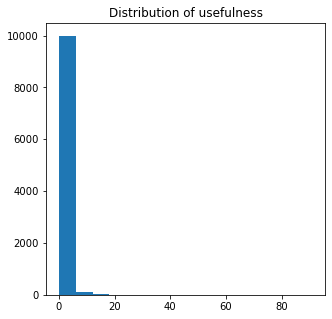

In [261]:
import matplotlib.pyplot as plt
plt.hist(df["useful"], bins=15);
plt.title('Distribution of usefulness')

In [262]:
df=pd.get_dummies(data=df, columns = ['timeflags'], drop_first=True)

In [263]:
from math import log
def convert(useful):
    return log(useful+1)
def convertSenti(sentiment):
    return abs(sentiment)
def intensity(comp):
    return abs(comp)

In [264]:
df['useful'] = df['useful'].apply(convert)

In [265]:
df['intensity'] = df['compound'].apply(intensity)

In [99]:
df.head()

,Unnamed: 0,reviewer,rating,date,review,useful,funny,cool,friends,reviewsCount,...,sentiment_new_scaled,restaurant_name,Unnamed: 0.1,scores,compound,sentiment_type,sent,timeflags_B,timeflags_C,intensity
0,0,1,5,2021-09-20,place absolutely amazing vibes good food even ...,0.000000,0.0,0.0,0,1,...,-0.422838,aunt-jakes-new-york-4,NaN,"{'neg': 0.058, 'neu': 0.578, 'pos': 0.364, 'co...",0.9128,POSITIVE,POSITIVE,0,1,4
1,1,2,5,2021-09-22,probably one favorite places ever upper east s...,0.693147,1.0,0.0,433,481,...,0.743981,aunt-jakes-new-york-4,NaN,"{'neg': 0.0, 'neu': 0.627, 'pos': 0.373, 'comp...",0.9833,POSITIVE,POSITIVE,0,1,8
2,2,3,5,2021-08-03,aunt jakes fabulous night anyone craving delic...,0.693147,0.0,0.0,35,55,...,1.035685,aunt-jakes-new-york-4,NaN,"{'neg': 0.0, 'neu': 0.618, 'pos': 0.382, 'comp...",0.9842,POSITIVE,POSITIVE,0,1,9
3,3,4,5,2021-06-21,wonderful brunch helpful staffswung brunch wal...,0.693147,0.0,0.0,1,224,...,0.743981,aunt-jakes-new-york-4,NaN,"{'neg': 0.0, 'neu': 0.63, 'pos': 0.37, 'compou...",0.9855,POSITIVE,POSITIVE,0,1,8
4,4,5,4,2021-10-10,pasta super solid reasonably priced ive eaten ...,0.000000,2.0,0.0,203,194,...,0.743981,aunt-jakes-new-york-4,NaN,"{'neg': 0.101, 'neu': 0.436, 'pos': 0.463, 'co...",0.9474,POSITIVE,POSITIVE,0,1,8


In [21]:
import warnings
warnings.filterwarnings('ignore')

In [266]:
x = df.drop(['compound', 'scores', 'sentiment_type', 'sent', 'Unnamed: 0', 'Unnamed: 0.1', 'useful', 'date', 'reviewer', 'review', 'token review', 'review_lemmatized', 'sentiment_new', 'sentiment_new_scaled'], axis=1)
#x = df.drop(['useful', 'date', 'reviewer', 'review', 'token review', 'review_lemmatized'], axis=1)
y= df['useful']
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
df_train = X_train
df_train['useful'] = y_train
df_test = X_test
df_test['useful'] = y_test

In [267]:
from sklearn.preprocessing import MinMaxScaler
  
scaler = MinMaxScaler()

df_train[["funny", "cool", "friends", "reviewsCount", "rating"]] = scaler.fit_transform(df_train[["funny", "cool", "friends", "reviewsCount", "rating"]])
df_test[["funny", "cool", "friends", "reviewsCount", "rating"]] = scaler.transform(df_test[["funny", "cool", "friends", "reviewsCount", "rating"]])

In [44]:
df_train

,rating,funny,cool,friends,reviewsCount,restaurant_name,timeflags_B,timeflags_C,intensity,useful
2730,1.00,0.000000,0.000000,0.008402,0.001101,uva-new-york,0,0,0.7650,0.000000
6194,1.00,0.000000,0.000000,0.009202,0.002446,lido-new-york,0,0,0.7650,0.693147
2480,0.50,0.000000,0.000000,0.000200,0.000122,uva-new-york,0,0,0.7003,0.000000
6826,0.50,0.000000,0.000000,0.000200,0.000306,lido-new-york,0,0,0.9668,0.000000
3357,0.50,0.000000,0.000000,0.021404,0.003180,uva-new-york,0,0,0.9169,0.000000
...,...,...,...,...,...,...,...,...,...,...
3506,1.00,0.010753,0.000000,0.077616,0.003914,vinater^1C3^1ADa-new-york-4,0,0,0.9664,0.693147
6367,0.75,0.000000,0.000000,0.000400,0.006360,lido-new-york,0,0,0.6705,0.000000
907,0.75,0.000000,0.000000,0.000600,0.000306,uva-new-york,0,1,0.9100,0.000000
7795,0.25,0.010753,0.092308,0.015003,0.021405,patsys-pizzeria-new-york-7,0,0,0.9703,1.945910


In [268]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
md = smf.mixedlm("useful ~ intensity+rating+funny+cool+friends+reviewsCount+timeflags_B+timeflags_C", df_train, 
                 groups=df_train["restaurant_name"])
mdf = md.fit()
print(mdf.summary())


         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: useful    
No. Observations: 7088    Method:             REML      
No. Groups:       18      Scale:              0.1947    
Min. group size:  16      Log-Likelihood:     -4295.2679
Max. group size:  1737    Converged:          Yes       
Mean group size:  393.8                                 
--------------------------------------------------------
             Coef.  Std.Err.    z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept     0.273    0.037   7.405 0.000  0.201  0.346
intensity     0.275    0.028   9.678 0.000  0.219  0.331
rating       -0.309    0.020 -15.827 0.000 -0.348 -0.271
funny         8.948    0.429  20.848 0.000  8.107  9.789
cool          3.311    0.309  10.732 0.000  2.707  3.916
friends       1.311    0.115  11.381 0.000  1.085  1.537
reviewsCount  1.232    0.143   8.585 0.000  0.951  1.513
timeflags_B   0.075    0.025   2.954 0.00

In [269]:
preds = mdf.predict(df_test)

Text(0.5, 1.0, 'Distribution of log(usefulness)')

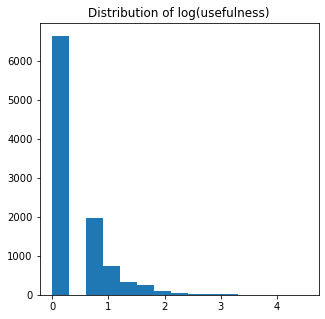

In [273]:
plt.hist(df["useful"], bins=15);
plt.title('Distribution of log(usefulness)')

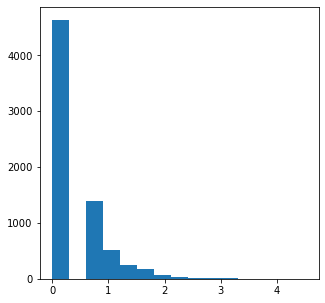

In [270]:
plt.hist(df_train["useful"], bins=15);

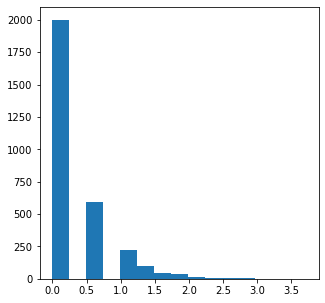

In [271]:
plt.hist(df_test["useful"], bins=15);

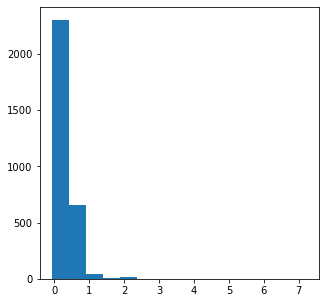

In [272]:
plt.hist(preds, bins=15);

Text(0.5, 1.0, 'intensity')

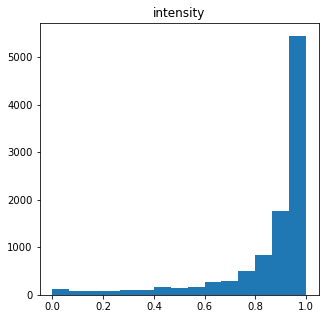

In [85]:
plt.hist(df['intensity'], bins=15);
plt.title("intensity")

In [75]:
preds.describe()

count    3039.000000
mean        0.385605
std         0.341406
min        -0.005654
25%         0.245542
50%         0.319891
75%         0.427517
max         8.550710
dtype: float64

In [76]:
df_test["useful"].describe()

count    3039.000000
mean        0.351717
std         0.554242
min         0.000000
25%         0.000000
50%         0.000000
75%         0.693147
max         3.637586
Name: useful, dtype: float64

In [2]:
import pandas as pd
from numpy import arange
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold

In [78]:
#define cross-validation method to evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

#define model
model = LassoCV(alphas=arange(0, 1, 0.01), cv=cv, n_jobs=-1)


#fit model
model.fit(df_train.drop(['restaurant_name', 'useful'], axis= 1), df_train['useful'])

#display lambda that produced the lowest test MSE
print(model.coef_)

[-0.24382017  7.58484384  5.00151597  1.36331443  2.03702267  0.10459157
  0.02248452  0.21669054]


In [80]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10)

In [81]:
xg_reg.fit(df_train.drop(['useful', 'restaurant_name'], axis=1),df_train['useful'])

preds = xg_reg.predict(df_test.drop(['useful', 'restaurant_name'], axis=1))

[18:11:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


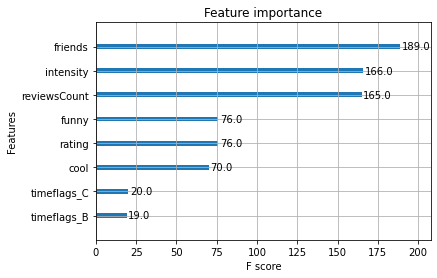

In [82]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [45]:
dfT = pd.read_csv('/Users/Lenna/OneDrive - stevens.edu/Mac/USA/Class/Fall21/BIA660/df1.csv')

In [46]:
import datetime
dfT['date'] = pd.to_datetime(dfT['date'])

In [47]:
df_rel = dfT[dfT['date']>=datetime.datetime(2019, 6, 15)]

In [48]:
#df_rel['intensity'] = df_rel['compound'].apply(intensity)
df_rel = df_rel[['compound', 'timeflags', 'restaurant_name']]

In [8]:
df_rel.head()

,compound,timeflags,restaurant_name
0,0.9128,C,aunt-jakes-new-york-4
1,0.9833,C,aunt-jakes-new-york-4
2,0.9842,C,aunt-jakes-new-york-4
3,0.9855,C,aunt-jakes-new-york-4
4,0.9474,C,aunt-jakes-new-york-4


In [49]:
grp = df_rel.groupby(['restaurant_name', 'timeflags']).aggregate(['mean'])
grp.index

MultiIndex([(                               'aunt-jakes-new-york-4', 'B'),
            (                               'aunt-jakes-new-york-4', 'C'),
            (                                 'babbalucci-new-york', 'A'),
            (                                 'babbalucci-new-york', 'B'),
            (                                 'babbalucci-new-york', 'C'),
            (                              'bigoi-venezia-new-york', 'A'),
            (                              'bigoi-venezia-new-york', 'B'),
            (                              'bigoi-venezia-new-york', 'C'),
            ('carmines-italian-restaurant-upper-west-side-new-york', 'A'),
            ('carmines-italian-restaurant-upper-west-side-new-york', 'B'),
            ('carmines-italian-restaurant-upper-west-side-new-york', 'C'),
            (                                     'fumo-new-york-3', 'A'),
            (                                     'fumo-new-york-3', 'B'),
            (            

In [50]:
grp.loc[('aunt-jakes-new-york-4', 'B')]['compound']['mean']

0.8237948717948717

In [51]:
A, B, C = [], [], []
for restaurant, timeframe in grp.index:
    # only two timeframes
    if restaurant != 'aunt-jakes-new-york-4':
        if timeframe=='A':
            A.append(grp.loc[(restaurant, 'A')]['compound']['mean'])
        elif timeframe=='B':
            B.append(grp.loc[(restaurant, 'B')]['compound']['mean'])
        else:
            C.append(grp.loc[(restaurant, 'C')]['compound']['mean'])

In [14]:
grp

compound
                                                                  mean
restaurant_name                                    timeflags          
aunt-jakes-new-york-4                              B          0.823795
                                                   C          0.806383
babbalucci-new-york                                A          0.739881
                                                   B          0.658444
                                                   C          0.694039
bigoi-venezia-new-york                             A          0.817383
                                                   B          0.911457
                                                   C          0.836265
carmines-italian-restaurant-upper-west-side-new... A          0.733994
                                                   B          0.594825
                                                   C          0.733992
fumo-new-york-3                                    A          0.796606
                                                   B          0.797900
                                                   C          0.707769
lido-new-york                                      A          0.759957
                                                   B          0.750610
                                                   C          0.757843
nocciola-ristorante-new-york-3                     A          0.734613
                                                   B          0.344033
                                                   C          0.689645
ortomare-ristorante-pizzeria-new-york-2            A          0.912274
                                                   B          0.849073
                                                   C          0.923959
osteria-106-new-york                               A          0.783711
                                                   B          0.908495
                                                   C          0.883036
osteria-laura-new-york                             A          0.917653
                                                   B          0.651425
                                                   C          0.853500
patsys-pizzeria-new-york-7                         A          0.503973
                                                   B          0.724307
                                                   C          0.533366
pisticci-new-york                                  A          0.835433
                                                   B          0.879831
                                                   C          0.885952
raos-new-york                                      A          0.775542
                                                   B          0.630318
                                                   C          0.941664
sfoglia-restaurant-new-york                        A          0.873271
                                                   B          0.751471
                                                   C          0.765733
trattoria-l-incontro-astoria-6                     A          0.823521
                                                   B          0.768320
                                                   C          0.908936
travertino-cucina-romana-new-york-3                A          0.851950
                                                   B          0.960725
                                                   C          0.932475
uva-new-york                                       A          0.790294
                                                   B          0.805786
                                                   C          0.810143
vinater^1C3^1ADa-new-york-4                        A          0.888980
                                                   B          0.817505
                                                   C          0.738211

In [52]:
import scipy.stats as stats
print(stats.ttest_rel(A, B))
print(stats.ttest_rel(B, C))

Ttest_relResult(statistic=1.4986205447224388, pvalue=0.1534421142171351)
Ttest_relResult(statistic=-1.3485819864355155, pvalue=0.1962517158835639)
